# Analysis of Donald Trump's Tweets 



In [ ]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border-style: solid;
}

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import LancasterStemmer
from bs4 import BeautifulSoup
#import spacy
import re,unicodedata,string
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob,Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import re

**Explanation for the above packages:**
- Count Vectorizer: This is used to transform the given text to sparse matrix or a vector by the word frequency count
- Tfidf Vectorizer: This is used to transform the given text to sparse matrix similar to Count Vectorizer or the Bag of Words. The difference is that Tfidf also provides more importance to the high count words and rarity of words relatively.
- LabelEncoder and LabelBinarizer: They convert the categorical strings to numerical values for classification. If there are more than two classes, Encoder is used.
- stopwords: Its a collection of common words to reduce the burden in finding the sense of the text.
- PorterStemmer and WordNetLemmatizer: They are used to get the root word of the word. 
- tokenization: Segmenting the words in a sentence.
- re : Regular Expression in python
- TextBlob: Its used to determine the polarity and subjectivity of the text.

In [ ]:
pd.set_option('float_format', '{:f}'.format)

### To download the dataset <a href = 'https://drive.google.com/file/d/19FxWRtYidfMBUbHZ9qtMHsgYStoLJ4ne/view?usp=sharing' title= 'Google Drive'> Click here

In [ ]:
trump_df = pd.read_csv(r'Copy of trumptweets.csv')

In [ ]:
trump_df

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
41117,1218962544372670467,https://twitter.com/realDonaldTrump/status/121...,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,NaN,NaN,NaN
41118,1219004689716412416,https://twitter.com/realDonaldTrump/status/121...,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,NaN,NaN,NaN
41119,1219053709428248576,https://twitter.com/realDonaldTrump/status/121...,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,NaN,#,NaN
41120,1219066007731310593,https://twitter.com/realDonaldTrump/status/121...,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,@ @ @,NaN,NaN


In [ ]:
trump_df.shape

(41122, 9)

In [ ]:
trump_df.columns

Index(['id', 'link', 'content', 'date', 'retweets', 'favorites', 'mentions',
       'hashtags', 'geo'],
      dtype='object')

In [ ]:
trump_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         41122 non-null  int64  
 1   link       41122 non-null  object 
 2   content    41122 non-null  object 
 3   date       41122 non-null  object 
 4   retweets   41122 non-null  int64  
 5   favorites  41122 non-null  int64  
 6   mentions   22467 non-null  object 
 7   hashtags   5810 non-null   object 
 8   geo        0 non-null      float64
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ MB


In [ ]:
trump_df.describe()

,id,retweets,favorites,geo
count,41122.000000,41122.000000,41122.000000,0.000000
mean,608890886708835200.000000,5455.590657,22356.899105,NaN
std,302794624798576512.000000,10130.076661,41501.859711,NaN
min,1698308935.000000,0.000000,0.000000,NaN
25%,354942771644209152.000000,25.000000,28.000000,NaN
50%,560914936703027200.000000,291.000000,247.000000,NaN
75%,794121829388584960.000000,8778.000000,32970.750000,NaN
max,1219076533354037248.000000,309892.000000,857678.000000,NaN


In [ ]:
trump_df.corr()

,id,retweets,favorites,geo
id,1.000000,0.687139,0.741623,NaN
retweets,0.687139,1.000000,0.944441,NaN
favorites,0.741623,0.944441,1.000000,NaN
geo,NaN,NaN,NaN,NaN


In [ ]:
pd.options.display.max_colwidth = 200

In [ ]:
trump_df['content']

0                                                                                          Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!
1                                                                            Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!
2                                                                                           Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!
3                                                                                                        New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e
4                                                                                                  "My persona will never be that of a wallflower - I’d rather build

In [ ]:
exclam = trump_df['content'].str.contains('!')

In [ ]:
exclam

0         True
1         True
2         True
3        False
4        False
         ...  
41117     True
41118     True
41119     True
41120     True
41121     True
Name: content, Length: 41122, dtype: bool

In [ ]:
exclam.value_counts()

False    20918
True     20204
Name: content, dtype: int64

In [ ]:
Answer02 = exclam.value_counts()[1]/len(trump_df)
print(Answer02)

0.491318515636399


In [ ]:
import datetime
from datetime import datetime

In [ ]:
trump_df['datetime'] = pd.to_datetime(trump_df['date'])
trump_df['day'] = trump_df['datetime'].dt.day
trump_df['month'] = trump_df['datetime'].dt.month
trump_df['hour'] = trump_df['datetime'].dt.hour
trump_df['year'] = trump_df['datetime'].dt.year

In [ ]:
trump_df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo,datetime,day,month,hour,year
0,1698308935,https://twitter.com/realDonaldTrump/status/1698308935,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,2009-05-04 20:54:25,500,868,NaN,NaN,NaN,2009-05-04 20:54:25,4,5,20,2009
1,1701461182,https://twitter.com/realDonaldTrump/status/1701461182,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,2009-05-05 03:00:10,33,273,NaN,NaN,NaN,2009-05-05 03:00:10,5,5,3,2009
2,1737479987,https://twitter.com/realDonaldTrump/status/1737479987,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,2009-05-08 15:38:08,12,18,NaN,NaN,NaN,2009-05-08 15:38:08,8,5,15,2009
3,1741160716,https://twitter.com/realDonaldTrump/status/1741160716,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,2009-05-08 22:40:15,11,24,NaN,NaN,NaN,2009-05-08 22:40:15,8,5,22,2009
4,1773561338,https://twitter.com/realDonaldTrump/status/1773561338,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN,2009-05-12 16:07:28,12,5,16,2009


In [ ]:
trump_df['mon_yr'] = pd.to_datetime(trump_df[["year", "month","day"]])

In [ ]:
trump_df['mon_yr_hr'] = pd.to_datetime(trump_df[["year","month","day","hour"]])

In [ ]:
trump_df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo,datetime,day,month,hour,year,mon_yr,mon_yr_hr
0,1698308935,https://twitter.com/realDonaldTrump/status/1698308935,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,2009-05-04 20:54:25,500,868,NaN,NaN,NaN,2009-05-04 20:54:25,4,5,20,2009,2009-05-04,2009-05-04 20:00:00
1,1701461182,https://twitter.com/realDonaldTrump/status/1701461182,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,2009-05-05 03:00:10,33,273,NaN,NaN,NaN,2009-05-05 03:00:10,5,5,3,2009,2009-05-05,2009-05-05 03:00:00
2,1737479987,https://twitter.com/realDonaldTrump/status/1737479987,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,2009-05-08 15:38:08,12,18,NaN,NaN,NaN,2009-05-08 15:38:08,8,5,15,2009,2009-05-08,2009-05-08 15:00:00
3,1741160716,https://twitter.com/realDonaldTrump/status/1741160716,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,2009-05-08 22:40:15,11,24,NaN,NaN,NaN,2009-05-08 22:40:15,8,5,22,2009,2009-05-08,2009-05-08 22:00:00
4,1773561338,https://twitter.com/realDonaldTrump/status/1773561338,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN,2009-05-12 16:07:28,12,5,16,2009,2009-05-12,2009-05-12 16:00:00


In [ ]:
tweet_count = trump_df.groupby('mon_yr').size().reset_index(name='tweet_count')
tweet_count_1 = tweet_count[np.logical_and((tweet_count['mon_yr']>'2015-09-01'),(tweet_count['mon_yr']<'2016-09-30'))==True]

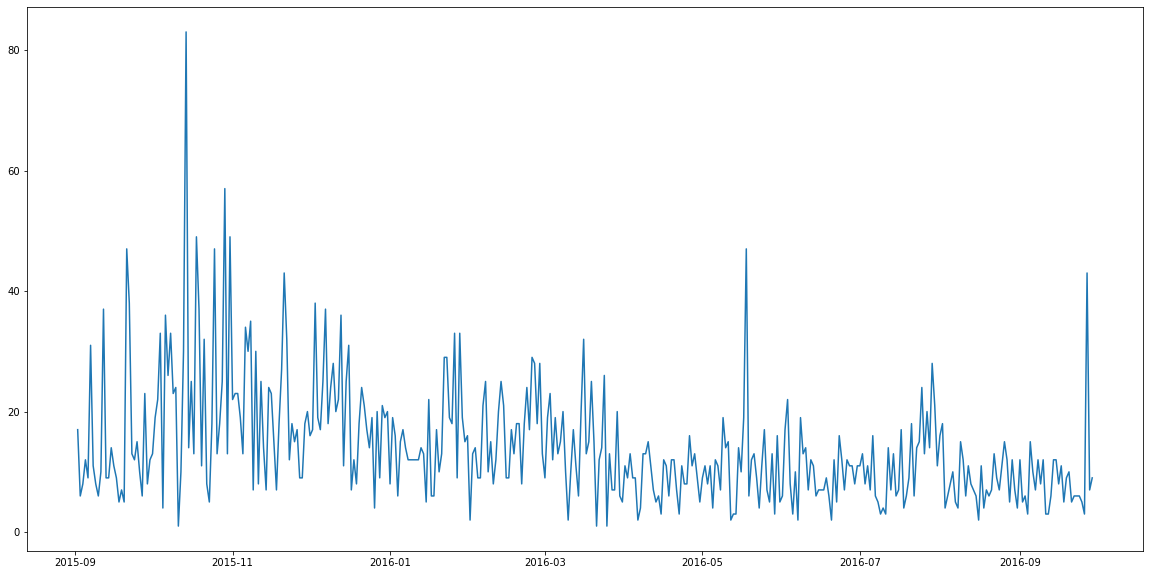

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(tweet_count_1['mon_yr'],tweet_count_1['tweet_count'])
plt.show()

In [ ]:
tokenizer = ToktokTokenizer()
stopwords_list = nltk.corpus.stopwords.words('english')

In [ ]:
df = trump_df[['content','retweets','favorites']]

In [ ]:
df.head()

,content,retweets,favorites
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,500,868
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,33,273
2,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,12,18
3,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,11,24
4,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump",1399,1965


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stemmer = PorterStemmer()
leammatizer = WordNetLemmatizer()

In [ ]:
def remove_html(text):
    return re.sub(r':.*$', ":",text) #Remove urls

def strip_html(text):
    soup = BeautifulSoup(text,"html.parser") #Remove https words
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]','',text)   #Remove special characters

def denoise_text(text):
    text = remove_html(text)
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text  #Function call
  
df['review'] = df['content'].apply(denoise_text)
df.head(5)

,content,retweets,favorites,review
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,500,868,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,33,273,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!
2,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,12,18,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman:
3,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,11,24,New Blog Post:
4,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump",1399,1965,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump"


### Removing Special characters

In [ ]:
def remove_special_characters(text,remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

df['review'] = df['review'].apply(remove_special_characters)
df.head(2)

,content,retweets,favorites,review
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,500,868,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,33,273,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion


In [ ]:
def simpleStemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

df['stem_review'] = df['review'].apply(simpleStemmer)
df.head(2)

,content,retweets,favorites,review,stem_review
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,500,868,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight,be sure to tune in and watch donald trump on late night with david letterman as he present the top ten list tonight
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,33,273,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion,donald trump will be appear on the view tomorrow morn to discuss celebr apprentic and hi new book think like a champion


In [ ]:
def simpleLemmatization(text):
    lemma = nltk.stem.WordNetLemmatizer()
    text = ' '.join([lemma.lemmatize(word) for word in text.split()])
    return text

df['lemmatize_review'] = df['review'].apply(simpleLemmatization)
df.head(2)

,content,retweets,favorites,review,stem_review,lemmatize_review
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,500,868,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight,be sure to tune in and watch donald trump on late night with david letterman as he present the top ten list tonight,Be sure to tune in and watch Donald Trump on Late Night with David Letterman a he present the Top Ten List tonight
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,33,273,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion,donald trump will be appear on the view tomorrow morn to discuss celebr apprentic and hi new book think like a champion,Donald Trump will be appearing on The View tomorrow morning to discus Celebrity Apprentice and his new book Think Like A Champion


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text,is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df['final_review'] = df['review'].apply(remove_stopwords)
df.head(2)

,content,retweets,favorites,review,stem_review,lemmatize_review,final_review
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,500,868,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight,be sure to tune in and watch donald trump on late night with david letterman as he present the top ten list tonight,Be sure to tune in and watch Donald Trump on Late Night with David Letterman a he present the Top Ten List tonight,sure tune watch Donald Trump Late Night David Letterman presents Top Ten List tonight
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,33,273,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion,donald trump will be appear on the view tomorrow morn to discuss celebr apprentic and hi new book think like a champion,Donald Trump will be appearing on The View tomorrow morning to discus Celebrity Apprentice and his new book Think Like A Champion,Donald Trump appearing View tomorrow morning discuss Celebrity Apprentice new book Think Like Champion


### Normalised train and test reviews

In [ ]:
norm_train_reviews = df.final_review[:34000]
print(norm_train_reviews[0])

norm_test_reviews=df.final_review[34000:]
print(norm_test_reviews[34500])

sure tune watch Donald Trump Late Night David Letterman presents Top Ten List tonight
FBI texts revealed antiTrump Bias FoxNews Big News Fake News doesnt want cover Total corruption Witch Hunt turned scam point soon Mainstream Media cover correctly big story


### Bag of Words

In [ ]:
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv_train_reviews = cv.fit_transform(norm_train_reviews)
cv_test_reviews = cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (34000, 303662)
BOW_cv_test: (7122, 303662)


In [ ]:
cv_train_reviews[1]

<1x303662 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [ ]:
cv_train_reviews[1].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Tf-idf; Term frequency and inverse document frequency

In [ ]:
tv = TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
tv_train_reviews = tv.fit_transform(norm_train_reviews)
tv_test_reviews=tv.transform(norm_test_reviews)


print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (34000, 303662)
Tfidf_test: (7122, 303662)


### Polarity and subjectivity

In [ ]:
pol = lambda x:TextBlob(x).sentiment.polarity
sub = lambda x:TextBlob(x).sentiment.subjectivity

df['polarity'] = df['final_review'].apply(pol)
df['subjectivity'] = df['final_review'].apply(sub)

df.head(2)

,content,retweets,favorites,review,stem_review,lemmatize_review,final_review,polarity,subjectivity
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,500,868,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight,be sure to tune in and watch donald trump on late night with david letterman as he present the top ten list tonight,Be sure to tune in and watch Donald Trump on Late Night with David Letterman a he present the Top Ten List tonight,sure tune watch Donald Trump Late Night David Letterman presents Top Ten List tonight,0.175000,0.497222
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,33,273,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion,donald trump will be appear on the view tomorrow morn to discuss celebr apprentic and hi new book think like a champion,Donald Trump will be appearing on The View tomorrow morning to discus Celebrity Apprentice and his new book Think Like A Champion,Donald Trump appearing View tomorrow morning discuss Celebrity Apprentice new book Think Like Champion,0.136364,0.454545


### Plot a graph to visualize the most common words used by Donald Trump in his tweets.

In [ ]:
tok = lambda x:word_tokenize(x)
df['tokenize'] = df['final_review'].apply(tok)
df.head(2)

,content,retweets,favorites,review,stem_review,lemmatize_review,final_review,polarity,subjectivity,tokenize
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,500,868,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight,be sure to tune in and watch donald trump on late night with david letterman as he present the top ten list tonight,Be sure to tune in and watch Donald Trump on Late Night with David Letterman a he present the Top Ten List tonight,sure tune watch Donald Trump Late Night David Letterman presents Top Ten List tonight,0.175000,0.497222,"[sure, tune, watch, Donald, Trump, Late, Night, David, Letterman, presents, Top, Ten, List, tonight]"
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,33,273,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion,donald trump will be appear on the view tomorrow morn to discuss celebr apprentic and hi new book think like a champion,Donald Trump will be appearing on The View tomorrow morning to discus Celebrity Apprentice and his new book Think Like A Champion,Donald Trump appearing View tomorrow morning discuss Celebrity Apprentice new book Think Like Champion,0.136364,0.454545,"[Donald, Trump, appearing, View, tomorrow, morning, discuss, Celebrity, Apprentice, new, book, Think, Like, Champion]"


In [ ]:
import itertools,collections

new_tokenize = df['tokenize']
all_words = list(itertools.chain(*new_tokenize))

In [ ]:
counts = collections.Counter(all_words)
count_frequency = counts.most_common(200)

clean_tweets = pd.DataFrame(counts.most_common(200),columns=['words', 'count'])
clean_tweets.head()

,words,count
0,great,2889
1,http,2704
2,Trump,1987
3,people,1778
4,Thank,1738


No of most common words to plot: 20


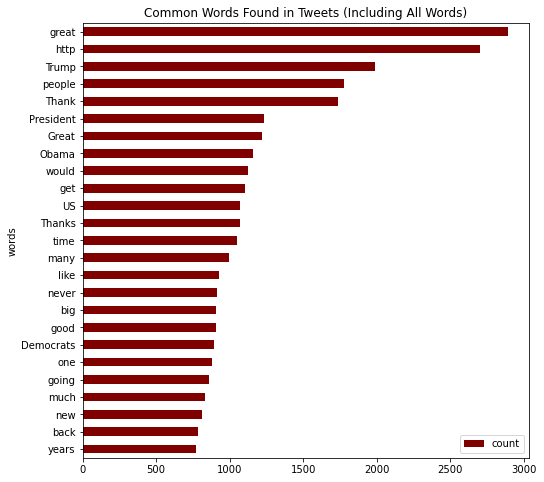

In [ ]:
Number = input('No of most common words to plot: ')
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets[:25].sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='maroon')
ax.set_title("Common Words Found in Tweets (Including All Words)")
plt.show()

Using sentiment.polarity_score function, Find the polarity score of all the tweets and categorize them as Positive, Negative or Neutral.

In [ ]:
PNN = df['polarity'].apply(lambda x: "Positive" if x>=0.05 else ("Negative" if x<= -0.05 else "Neutral"))
new_review = df['final_review']
new_review = new_review.tolist()
PNN = PNN.tolist()

dict = {'text':new_review, 'polarity':PNN}
pnn = pd.DataFrame(dict)
pnn.head()

,text,polarity
0,sure tune watch Donald Trump Late Night David Letterman presents Top Ten List tonight,Positive
1,Donald Trump appearing View tomorrow morning discuss Celebrity Apprentice new book Think Like Champion,Positive
2,Donald Trump reads Top Ten Financial Tips Late Show David Letterman,Positive
3,New Blog Post,Positive
4,persona never wallflower Id rather build walls cling Donald J Trump,Neutral


### Word Cloud

Using wordcloud or other visualization techniques, Find the most common words used positive and negative tweets

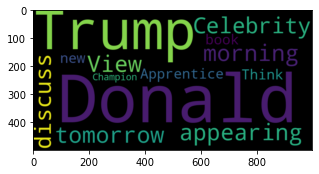

In [ ]:
plt.figure(figsize=(5,5))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show()

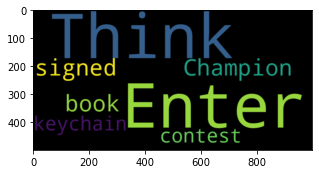

In [ ]:
plt.figure(figsize=(5,5))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show()

### Converting the numerical data to categorical - Positive and Negative

Based on the polarity scores of every tweet, plot the mean positivity / negativity scores with respect to year.

In [ ]:
df['PN'] = df['polarity'].apply(lambda x: "Positive" if x>=0 else "Negative")

In [ ]:
df.head(2)

,content,retweets,favorites,review,stem_review,lemmatize_review,final_review,polarity,subjectivity,tokenize,PN
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,500,868,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight,be sure to tune in and watch donald trump on late night with david letterman as he present the top ten list tonight,Be sure to tune in and watch Donald Trump on Late Night with David Letterman a he present the Top Ten List tonight,sure tune watch Donald Trump Late Night David Letterman presents Top Ten List tonight,0.175000,0.497222,"[sure, tune, watch, Donald, Trump, Late, Night, David, Letterman, presents, Top, Ten, List, tonight]",Positive
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,33,273,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion,donald trump will be appear on the view tomorrow morn to discuss celebr apprentic and hi new book think like a champion,Donald Trump will be appearing on The View tomorrow morning to discus Celebrity Apprentice and his new book Think Like A Champion,Donald Trump appearing View tomorrow morning discuss Celebrity Apprentice new book Think Like Champion,0.136364,0.454545,"[Donald, Trump, appearing, View, tomorrow, morning, discuss, Celebrity, Apprentice, new, book, Think, Like, Champion]",Positive


### Label Binarizer

In [ ]:
lb = LabelBinarizer()
df['label'] = lb.fit_transform(df['PN'])

In [ ]:
df.head(2)

,content,retweets,favorites,review,stem_review,lemmatize_review,final_review,polarity,subjectivity,tokenize,PN,label
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,500,868,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight,be sure to tune in and watch donald trump on late night with david letterman as he present the top ten list tonight,Be sure to tune in and watch Donald Trump on Late Night with David Letterman a he present the Top Ten List tonight,sure tune watch Donald Trump Late Night David Letterman presents Top Ten List tonight,0.175000,0.497222,"[sure, tune, watch, Donald, Trump, Late, Night, David, Letterman, presents, Top, Ten, List, tonight]",Positive,1
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,33,273,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion,donald trump will be appear on the view tomorrow morn to discuss celebr apprentic and hi new book think like a champion,Donald Trump will be appearing on The View tomorrow morning to discus Celebrity Apprentice and his new book Think Like A Champion,Donald Trump appearing View tomorrow morning discuss Celebrity Apprentice new book Think Like Champion,0.136364,0.454545,"[Donald, Trump, appearing, View, tomorrow, morning, discuss, Celebrity, Apprentice, new, book, Think, Like, Champion]",Positive,1


### Data into train and test data

Split the dataset into train / test set and perform feature engineering to get the top features (or create new features, if required)

**Here, we don't need any feature engineering because we are concerned only with the output that is polarity.** <br>
**The required attributes are formed earlier through out the cleaning process.**<br>
**Required graphs are also plotted.**<br>

In [ ]:
train = df.label[:34000]
test = df.label[34000:]

### Modelling the dataset

In [ ]:
lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr_bow = lr.fit(cv_train_reviews,train) #From Bag of Words
print(lr_bow)

lr_tfidf = lr.fit(tv_train_reviews,train) #TFIDF 
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


### Logistic Regression and Model Performance

In [ ]:
lr_bow_predict = lr.predict(cv_test_reviews)
print(lr_bow_predict)
lr_tfidf_predict = lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [ ]:
print(lr_bow_predict.shape)
print(lr_tfidf_predict.shape)

(7122,)
(7122,)


In [ ]:
cv_test_reviews[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
content = df['content'][34000:].tolist()

In [ ]:
dict = {'content':content,'test':test, 'bow':lr_bow_predict, 'tfidf': lr_tfidf_predict}
df1 = pd.DataFrame(dict)

In [ ]:
df1.head()

,content,test,bow,tfidf
34000,"Just heard the Campaign was sued by the Obstructionist Democrats. This can be good news in that we will now counter for the DNC Server that they refused to give to the FBI, the Debbie Wasserman Sc...",1,1,1
34001,"James Comey illegally leaked classified documents to the press in order to generate a Special Council? Therefore, the Special Council was established based on an illegal act? Really, does everybod...",0,1,1
34002,A message from Kim Jong Un: “North Korea will stop nuclear tests and launches of intercontinental ballistic missiles.” Also will “Shut down a nuclear test site in the country’s Northern Side to pr...,1,1,1
34003,"The New York Times and a third rate reporter named Maggie Haberman, known as a Crooked H flunkie who I don’t speak to and have nothing to do with, are going out of their way to destroy Michael Coh...",0,1,1
34004,"....non-existent “sources” and a drunk/drugged up loser who hates Michael, a fine person with a wonderful family. Michael is a businessman for his own account/lawyer who I have always liked & resp...",1,1,1


In [ ]:
df1[df1['test']!=df1['bow']]

,content,test,bow,tfidf
34001,"James Comey illegally leaked classified documents to the press in order to generate a Special Council? Therefore, the Special Council was established based on an illegal act? Really, does everybod...",0,1,1
34003,"The New York Times and a third rate reporter named Maggie Haberman, known as a Crooked H flunkie who I don’t speak to and have nothing to do with, are going out of their way to destroy Michael Coh...",0,1,1
34005,"....it means lying or making up stories. Sorry, I don’t see Michael doing that despite the horrible Witch Hunt and the dishonest media!",0,1,1
34013,The Washington Post said I refer to Jeff Sessions as “Mr. Magoo” and Rod Rosenstein as “Mr. Peepers.” This is “according to people with whom the president has spoken.” There are no such people and...,0,1,1
34014,“At least two Memos Comey shared with a friend contained Classified Information.” Wall Street Journal,0,1,1
...,...,...,...,...
41109,"They are taking the Democrat Nomination away from Crazy Bernie, just like last time. Some things never change!",0,1,1
41111,"A massive 200 Billion Dollar Sea Wall, built around New York to protect it from rare storms, is a costly, foolish & environmentally unfriendly idea that, when needed, probably won’t work anyway. I...",0,1,1
41113,"If you listened to the flawed advice of @ paulkrugman at the @ nytimes, a newspaper that was going broke until I came along, you would have entirely missed the RECORD BREAKING Stock Market (and ot...",0,1,1
41118,"Now Mini Mike Bloomberg is critical of Jack Wilson, who saved perhaps hundreds of people in a Church because he was carrying a gun, and knew how to use it. Jack quickly killed the shooter, who was...",0,1,1


### Accuracy score

In [ ]:
lr_bow_score = accuracy_score(test,lr_bow_predict)
print(lr_bow_score)
lr_tfidf_score = accuracy_score(test,lr_tfidf_predict)
print(lr_tfidf_score)

0.7742207245155855
0.7742207245155855


In [ ]:
lr_bow_report=classification_report(test,lr_bow_predict,target_names=['Negative','Positive'])
print(lr_bow_report)
lr_tfidf_report = classification_report(test,lr_tfidf_predict,target_names=['Negative','Positive'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1608
    Positive       0.77      1.00      0.87      5514

    accuracy                           0.77      7122
   macro avg       0.39      0.50      0.44      7122
weighted avg       0.60      0.77      0.68      7122

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1608
    Positive       0.77      1.00      0.87      5514

    accuracy                           0.77      7122
   macro avg       0.39      0.50      0.44      7122
weighted avg       0.60      0.77      0.68      7122



### Confusion matrix

In [ ]:
cm_bow = confusion_matrix(test,lr_bow_predict,labels=[0,1])
print(cm_bow)
cm_tfidf = confusion_matrix(test,lr_tfidf_predict,labels=[0,1])
print(cm_tfidf)

[[   0 1608]
 [   0 5514]]
[[   0 1608]
 [   0 5514]]


# Support Vector Machines

In [ ]:
lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr_bow = lr.fit(cv_train_reviews,train) #From Bag of Words
print(lr_bow)

lr_tfidf = lr.fit(tv_train_reviews,train) #TFIDF 
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


### Linear support vector machines for bag of words and tfidf features

In [ ]:
from sklearn import svm
svm = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)
svm_bow = svm.fit(cv_train_reviews,train)
print(svm_bow)
svm_tfidf = svm.fit(tv_train_reviews,train)
print(svm_tfidf)

SVC(kernel='linear', random_state=0)
SVC(kernel='linear', random_state=0)


### Model building and evaluation

In [ ]:
svm_bow_predict = svm.predict(cv_test_reviews)
print(svm_bow_predict)
svm_tfidf_predict = svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


### Accuracy Score

In [ ]:
svm_bow_score = accuracy_score(test,svm_bow_predict)
print(svm_bow_score)
svm_tfidf_score = accuracy_score(test,svm_tfidf_predict)
print(svm_tfidf_score)

0.776748104465038
0.7742207245155855


### Classification report

In [ ]:
svm_bow_report = classification_report(test,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
svm_tfidf_report = classification_report(test,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.61      0.03      0.06      1608
    Negative       0.78      0.99      0.87      5514

    accuracy                           0.78      7122
   macro avg       0.70      0.51      0.47      7122
weighted avg       0.74      0.78      0.69      7122

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00      1608
    Negative       0.77      1.00      0.87      5514

    accuracy                           0.77      7122
   macro avg       0.39      0.50      0.44      7122
weighted avg       0.60      0.77      0.68      7122



### Confusion matrix

In [ ]:
cm_bow = confusion_matrix(test,svm_bow_predict,labels=[1,0])
print(cm_bow)
cm_tfidf = confusion_matrix(test,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[5483   31]
 [1559   49]]
[[5514    0]
 [1608    0]]


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier ()

In [ ]:
knn_bow = knn.fit(cv_train_reviews,train)
print(knn_bow)
knn_tfidf = knn.fit(tv_train_reviews,train)
print(knn_tfidf)

KNeighborsClassifier()
KNeighborsClassifier()


In [ ]:
knn_bow_predict = knn.predict(cv_test_reviews)
print(knn_bow_predict)
knn_tfidf_predict = knn.predict(tv_test_reviews)
print(knn_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [ ]:
knn_bow_score = accuracy_score(test,knn_bow_predict)
print(knn_bow_score)
knn_tfidf_score = accuracy_score(test,knn_tfidf_predict)
print(knn_tfidf_score)

0.7742207245155855
0.7740803145183938


In [ ]:
knn_bow_report = classification_report(test,knn_bow_predict,target_names=['Positive','Negative'])
print(knn_bow_report)
knn_tfidf_report = classification_report(test,knn_tfidf_predict,target_names=['Positive','Negative'])
print(knn_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00      1608
    Negative       0.77      1.00      0.87      5514

    accuracy                           0.77      7122
   macro avg       0.39      0.50      0.44      7122
weighted avg       0.60      0.77      0.68      7122

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00      1608
    Negative       0.77      1.00      0.87      5514

    accuracy                           0.77      7122
   macro avg       0.39      0.50      0.44      7122
weighted avg       0.60      0.77      0.68      7122



In [ ]:
cm_bow = confusion_matrix(test,knn_bow_predict,labels=[0,1])
print(cm_bow)
cm_tfidf = confusion_matrix(test,knn_tfidf_predict,labels=[0,1])
print(cm_tfidf)

[[   0 1608]
 [   0 5514]]
[[   0 1608]
 [   1 5513]]


# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier (criterion = 'entropy',max_depth=3)

In [ ]:
dtc_bow = dtc.fit(cv_train_reviews,train)
print(dtc_bow)
dtc_tfidf = dtc.fit(tv_train_reviews,train)
print(dtc_tfidf)

DecisionTreeClassifier(criterion='entropy', max_depth=3)
DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [ ]:
dtc_bow_predict = dtc.predict(cv_test_reviews)
print(dtc_bow_predict)
dtc_tfidf_predict = dtc.predict(tv_test_reviews)
print(dtc_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [ ]:
dtc_bow_score = accuracy_score(test,dtc_bow_predict)
print(dtc_bow_score)
dtc_tfidf_score = accuracy_score(test,dtc_tfidf_predict)
print(dtc_tfidf_score)

0.7743611345127773
0.7743611345127773


In [ ]:
dtc_bow_report = classification_report(test,dtc_bow_predict,target_names=['Positive','Negative'])
print(dtc_bow_report)
dtc_tfidf_report = classification_report(test,dtc_tfidf_predict,target_names=['Positive','Negative'])
print(dtc_tfidf_report)

              precision    recall  f1-score   support

    Positive       1.00      0.00      0.00      1608
    Negative       0.77      1.00      0.87      5514

    accuracy                           0.77      7122
   macro avg       0.89      0.50      0.44      7122
weighted avg       0.83      0.77      0.68      7122

              precision    recall  f1-score   support

    Positive       1.00      0.00      0.00      1608
    Negative       0.77      1.00      0.87      5514

    accuracy                           0.77      7122
   macro avg       0.89      0.50      0.44      7122
weighted avg       0.83      0.77      0.68      7122



In [ ]:
cm_bow = confusion_matrix(test,dtc_bow_predict,labels=[0,1])
print(cm_bow)
cm_tfidf = confusion_matrix(test,dtc_tfidf_predict,labels=[0,1])
print(cm_tfidf)

[[   1 1607]
 [   0 5514]]
[[   1 1607]
 [   0 5514]]


                                                                      **Thank you**